In [113]:
import numpy as np
import cv2
import dlib
import os

import matplotlib.pyplot as plt

import pandas as pd
 
# faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
 
# 얼굴의 각 구역의 포인트들을 구분해 놓기
JAWLINE_POINTS = list(range(0, 17))

RIGHT_EYEBROW_POINTS = list(range(17, 22))
LEFT_EYEBROW_POINTS = list(range(22, 27))

NOSE_POINTS = list(range(27, 36))

RIGHT_EYE_POINTS = list(range(36, 42))
LEFT_EYE_POINTS = list(range(42, 48))

MOUTH_OUTLINE_POINTS = list(range(48, 61))
MOUTH_INNER_POINTS = list(range(61, 68))
 
""" 
    def = dlib를 이용 얼굴과 눈을 찾는 함수
    input = 그레이 스케일 이미지
    output = 얼굴 중요 68개의 포인트 에 그려진 점 + 이미지
"""

cd = {"autumn" : "warm",
     "spring" : "warm",
     "summer": "cool",
     "winter": "cool"}


def detect(gray,frame):
    global aa
    global bb
    global aa_r
    global aa_l
    # 일단, 등록한 Cascade classifier 를 이용 얼굴을 찾음
    faces = faceCascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=5, minSize=(100, 100), flags=cv2.CASCADE_SCALE_IMAGE)
 
    # 얼굴에서 랜드마크를 찾자
    for (x, y, w, h) in faces:
        # 오픈 CV 이미지를 dlib용 사각형으로 변환하고
        dlib_rect = dlib.rectangle(int(x), int(y), int(x + w), int(y + h))
        # 랜드마크 포인트들 지정
        landmarks = np.matrix([[p.x, p.y] for p in predictor(frame, dlib_rect).parts()])
        # 원하는 포인트들을 넣는다, 지금은 전부
        landmarks_display = landmarks[0:68]
        # 눈만 = landmarks_display = landmarks[RIGHT_EYE_POINTS, LEFT_EYE_POINTS]
 
        # 포인트 출력
        aa = ((landmarks[RIGHT_EYEBROW_POINTS][0,0], landmarks[LEFT_EYEBROW_POINTS][0,1]), (landmarks[LEFT_EYEBROW_POINTS][4,0], landmarks[JAWLINE_POINTS][8,1]))
        aa_r = ((landmarks[NOSE_POINTS][2][1], landmarks[NOSE_POINTS][3][1]), (landmarks[RIGHT_EYEBROW_POINTS][2][0], landmarks[RIGHT_EYEBROW_POINTS][3][0]))
        aa_l = ((landmarks[NOSE_POINTS][2][1], landmarks[NOSE_POINTS][3][1]), (landmarks[LEFT_EYEBROW_POINTS][2][0], landmarks[LEFT_EYEBROW_POINTS][3][0]))
    
        bb = landmarks

#         for idx, point in enumerate(landmarks_display):
#             pos = (point[0, 0], point[0, 1])
            
#             cv2.circle(frame, pos, 2, color=(0, 255, 255), thickness=-1)
 
    return frame

path = "./color2/"
name_list = os.listdir(path)

color_path = "./color_chart/"
color_list = os.listdir(color_path)

f = open("./human_color_v4.txt", "w")

f.write("name,season,season2,vl,va,vb,vh,vs,vv,l,a,b,h,s,v\n")

f_count=0

name_list.sort()

season_list = ["spring", "summer", "autumn", "winter"]

for n in name_list:
    
    try:
        name = path + n

        season = n.split(" ")[0]

        img = cv2.imread(name)

#         img_right = img[30:50, 10:30]
#         img_left = img[40:60, 60:80]
        
        

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2RGB)
        img_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2RGB)  


        ## 얼굴 전체의 평균 값 
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

        h = hsv[:,:,0] # h 
        s = hsv[:,:,1] # s
        v = hsv[:,:,2] # v

        l, a, b = cv2.split(lab)

        h = np.median(h)
        s = np.median(s)
        v = np.median(v)

        l = np.median(l)
        a = np.median(a)
        b = np.median(b)

    #     print("h :", np.median(h), "s :", np.median(s), "v :", np.median(v))
    #     print("l :", np.median(l), "a :", np.median(a), "b :", np.median(b))

    #     print("b-a :", np.median(b-a))

        color_df = pd.read_csv("./color_chart.txt")

        for k in season_list:

            df_list = color_df[ color_df["season"] == k + "_" + cd[k]]

            for j in df_list.index:
                print(j)
                df_iloc = df_list.loc[j]
                df_l = df_iloc["l"]
                df_a = df_iloc["a"]
                df_b = df_iloc["b"]
                df_h = df_iloc["h"]
                df_s = df_iloc["s"]
                df_v = df_iloc["v"]

        #         f.write(f"{n},{season},{l},{a},{b},{h},{s},{v},{l-df_l},{a-df_a},{b-df_b},{h-df_h},{s-df_s},{v-df_v}")
                f.write(f"{n},{season},{k},{abs(int(l-df_l))},{abs(int(a-df_a))},{abs(int(b-df_b))},{abs(int(h-df_h))},{abs(int(s-df_s))},{abs(int(v-df_v))},{l},{a},{b},{h},{s},{v}\n")
    except:
        f_count+=1


f.close()

f_count


2
4
11
14
17
18
20
21
25
26
27
36
39
41
45
54
59
60
64
65
66
75
76
85
91
94
99
0
3
6
10
12
13
23
31
32
34
38
51
52
56
57
62
70
78
79
80
86
87
88
96
100
101
106
7
8
9
19
22
24
30
33
43
44
47
48
49
53
58
67
71
73
74
81
82
83
90
97
102
104
105
1
5
15
16
28
29
35
37
40
42
46
50
55
61
63
68
69
72
77
84
89
92
93
95
98
103
2
4
11
14
17
18
20
21
25
26
27
36
39
41
45
54
59
60
64
65
66
75
76
85
91
94
99
0
3
6
10
12
13
23
31
32
34
38
51
52
56
57
62
70
78
79
80
86
87
88
96
100
101
106
7
8
9
19
22
24
30
33
43
44
47
48
49
53
58
67
71
73
74
81
82
83
90
97
102
104
105
1
5
15
16
28
29
35
37
40
42
46
50
55
61
63
68
69
72
77
84
89
92
93
95
98
103
2
4
11
14
17
18
20
21
25
26
27
36
39
41
45
54
59
60
64
65
66
75
76
85
91
94
99
0
3
6
10
12
13
23
31
32
34
38
51
52
56
57
62
70
78
79
80
86
87
88
96
100
101
106
7
8
9
19
22
24
30
33
43
44
47
48
49
53
58
67
71
73
74
81
82
83
90
97
102
104
105
1
5
15
16
28
29
35
37
40
42
46
50
55
61
63
68
69
72
77
84
89
92
93
95
98
103
2
4
11
14
17
18
20
21
25
26
27
36
39
41
45
54


2
4
11
14
17
18
20
21
25
26
27
36
39
41
45
54
59
60
64
65
66
75
76
85
91
94
99
0
3
6
10
12
13
23
31
32
34
38
51
52
56
57
62
70
78
79
80
86
87
88
96
100
101
106
7
8
9
19
22
24
30
33
43
44
47
48
49
53
58
67
71
73
74
81
82
83
90
97
102
104
105
1
5
15
16
28
29
35
37
40
42
46
50
55
61
63
68
69
72
77
84
89
92
93
95
98
103


0

In [129]:
c = pd.read_csv("./human_color_v4.txt")

gg = c.sort_values(by=["season", "season2", "vl", "va", "vb"], ascending=False)

gg.to_csv("./human4.csv")

gg

,name,season,season2,vl,va,vb,vh,vs,vv,l,a,b,h,s,v
2878,winter (92).jpg,winter,winter,189,9,13,11,72,211,189.0,137.0,141.0,11.0,72.0,211.0
2985,winter (94).jpg,winter,winter,179,9,6,5,44,197,179.0,137.0,134.0,5.0,44.0,197.0
2664,winter (84).jpg,winter,winter,176,13,14,8,76,200,176.0,141.0,142.0,8.0,76.0,200.0
2883,winter (92).jpg,winter,winter,171,23,56,114,170,131,189.0,137.0,141.0,11.0,72.0,211.0
2450,winter (80).jpg,winter,winter,162,7,6,7,45,180,162.0,135.0,134.0,7.0,45.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,autumn (7) (copy).jpg,autumn,autumn,2,23,57,18,176,21,183.0,142.0,144.0,9.0,78.0,213.0
167,autumn (14).PNG,autumn,autumn,2,18,10,18,70,37,123.0,143.0,149.0,11.0,115.0,155.0
162,autumn (14).PNG,autumn,autumn,1,15,32,3,116,23,123.0,143.0,149.0,11.0,115.0,155.0
70,autumn (1) (copy).jpg,autumn,autumn,1,10,13,11,13,13,199.0,142.0,138.0,6.0,65.0,231.0


In [ ]:
c = pd.read_csv("./human_color_v4.txt")

gg = c.sort_values(by=["season", "season2", "vl", "va", "vb"], ascending=False)

gg

<AxesSubplot:>

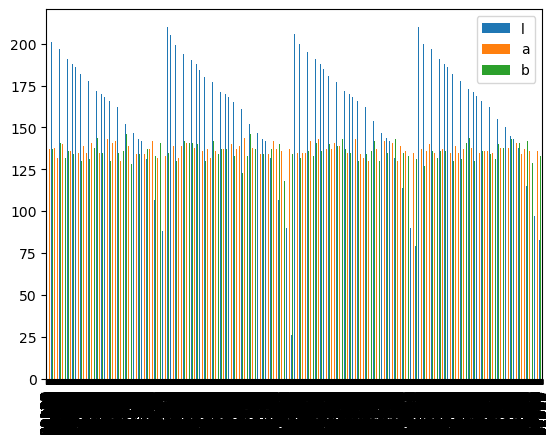

In [93]:
gg[gg["season"]=="winter"][["vl", "va", "vb"]].plot(kind="bar")
# gg[gg["season"]=="winter"][["l", "a", "b"]].sort_values(by=["a"], ascending=False).plot(kind="bar")
# gg[gg["season"]=="winter"][["l", "a", "b"]].sort_values(by=["b"], ascending=False).plot(kind="bar")

<AxesSubplot:>

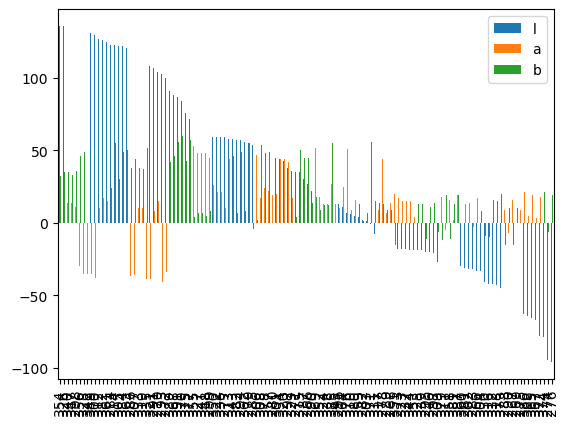

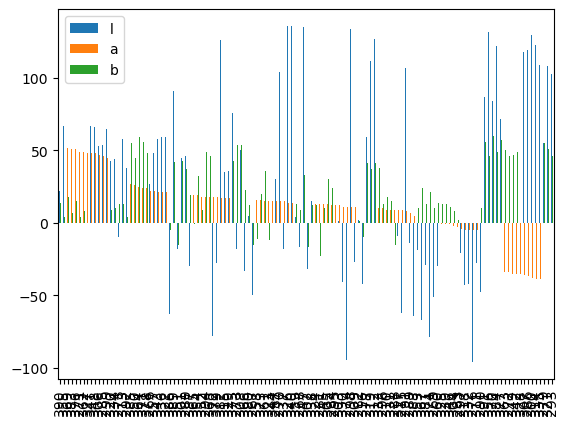

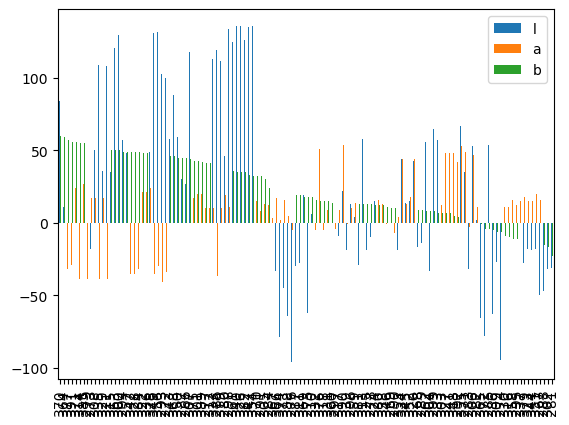

In [125]:
gg[gg["season"]=="summer"][["l", "a", "b"]].plot(kind="bar")
gg[gg["season"]=="summer"][["l", "a", "b"]].sort_values(by=["a"], ascending=False).plot(kind="bar")
gg[gg["season"]=="summer"][["l", "a", "b"]].sort_values(by=["b"], ascending=False).plot(kind="bar")

<AxesSubplot:>

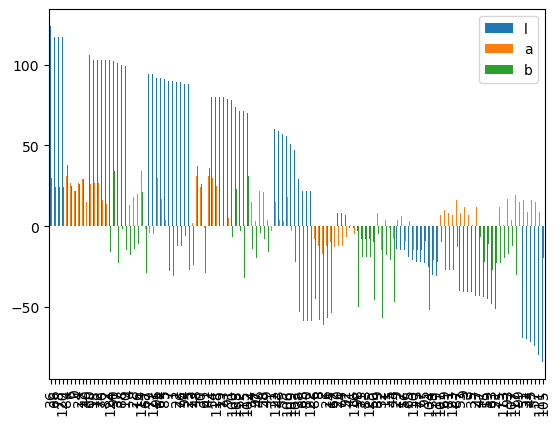

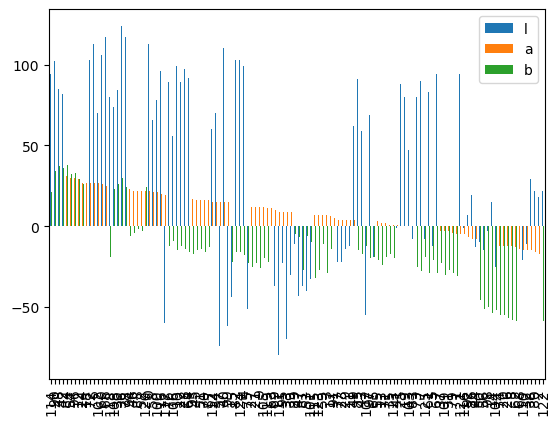

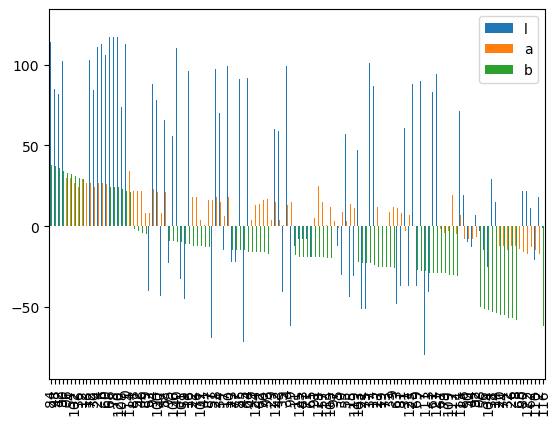

In [126]:
gg[gg["season"]=="autumn"][["l", "a", "b"]].plot(kind="bar")
gg[gg["season"]=="autumn"][["l", "a", "b"]].sort_values(by=["a"], ascending=False).plot(kind="bar")
gg[gg["season"]=="autumn"][["l", "a", "b"]].sort_values(by=["b"], ascending=False).plot(kind="bar")

<AxesSubplot:>

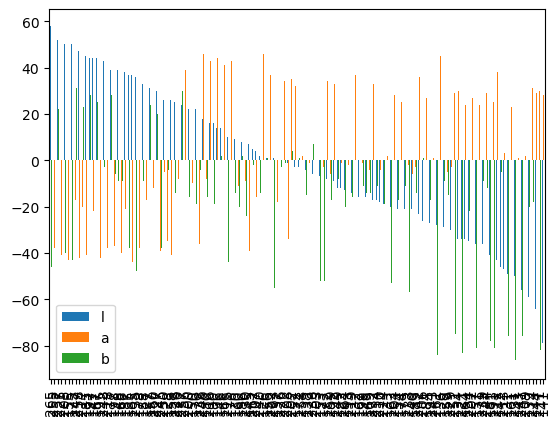

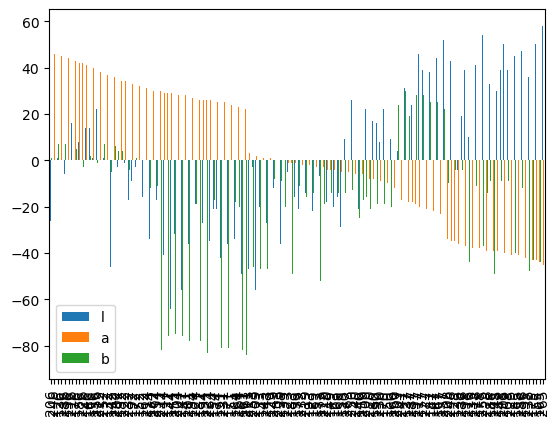

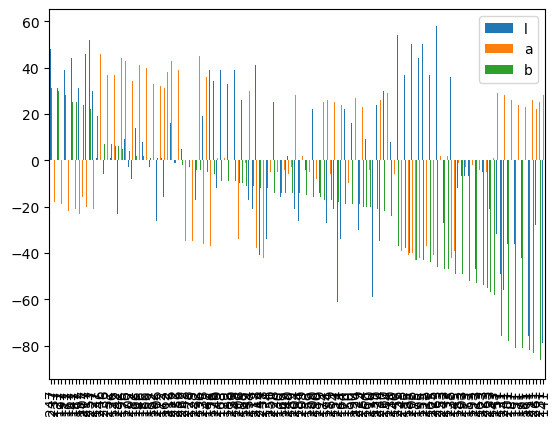

In [127]:
gg[gg["season"]=="spring"][["l", "a", "b"]].plot(kind="bar")
gg[gg["season"]=="spring"][["l", "a", "b"]].sort_values(by=["a"], ascending=False).plot(kind="bar")
gg[gg["season"]=="spring"][["l", "a", "b"]].sort_values(by=["b"], ascending=False).plot(kind="bar")

/tmp/ipykernel_6678/3495785540.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="winter"][gg["season2"]=="spring"][["l", "a", "b"]].plot(kind="bar")


<AxesSubplot:>

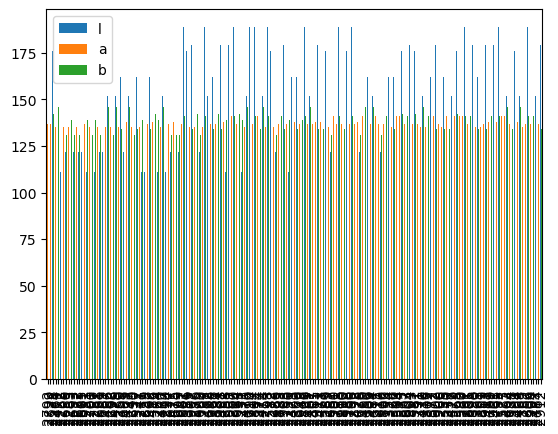

In [135]:
gg[gg["season"]=="winter"][gg["season2"]=="spring"][["l", "a", "b"]].plot(kind="bar")

/tmp/ipykernel_6678/559753266.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="winter"][gg["season2"]=="spring"][["vl", "va", "vb"]].plot(kind="bar")


<AxesSubplot:>

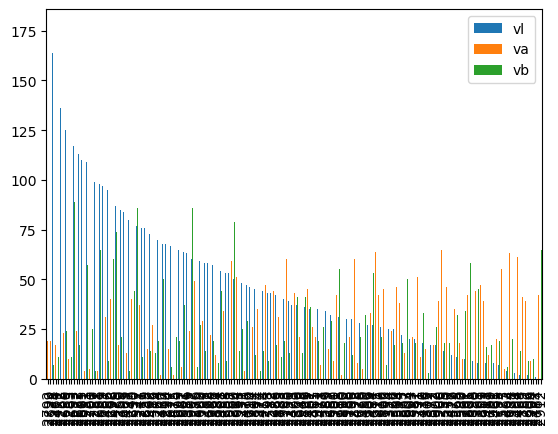

In [130]:
gg[gg["season"]=="winter"][gg["season2"]=="spring"][["vl", "va", "vb"]].plot(kind="bar")

/tmp/ipykernel_6678/2989661025.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="winter"][gg["season2"]=="summer"][["vl", "va", "vb"]].plot(kind="bar")


<AxesSubplot:>

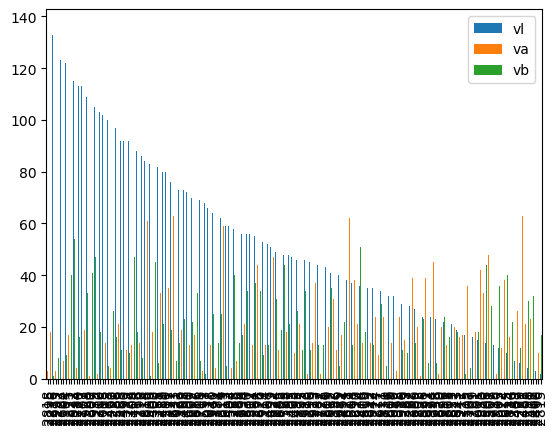

In [131]:
gg[gg["season"]=="winter"][gg["season2"]=="summer"][["vl", "va", "vb"]].plot(kind="bar")

/tmp/ipykernel_6678/2804775518.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="winter"][gg["season2"]=="autumn"][["vl", "va", "vb"]].plot(kind="bar")


<AxesSubplot:>

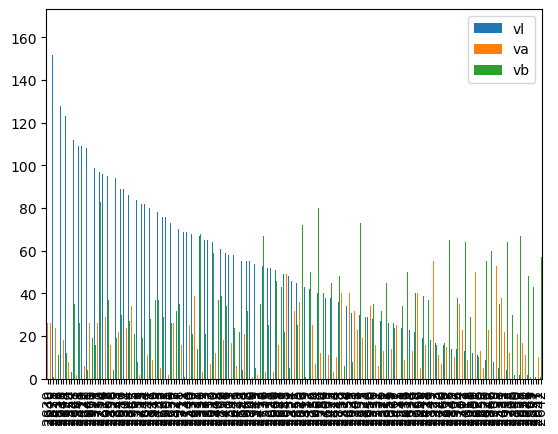

In [132]:
gg[gg["season"]=="winter"][gg["season2"]=="autumn"][["vl", "va", "vb"]].plot(kind="bar")

/tmp/ipykernel_6678/2888596409.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="winter"][gg["season2"]=="winter"][["vl", "va", "vb"]].plot(kind="bar")


<AxesSubplot:>

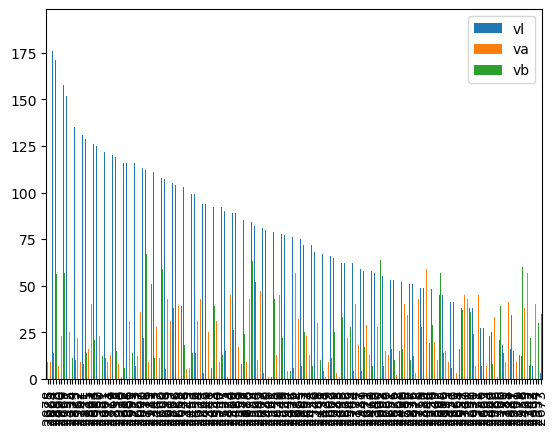

In [133]:
gg[gg["season"]=="winter"][gg["season2"]=="winter"][["vl", "va", "vb"]].plot(kind="bar")

/tmp/ipykernel_6678/1769382430.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="summer"][gg["season2"]=="spring"][["vl", "va", "vb"]].plot(kind="bar")


<AxesSubplot:>

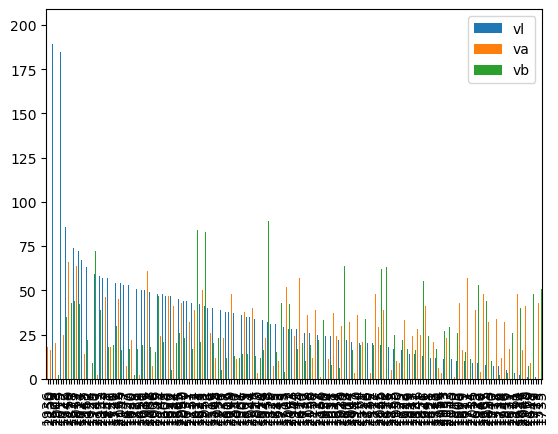

In [136]:
gg[gg["season"]=="summer"][gg["season2"]=="spring"][["vl", "va", "vb"]].plot(kind="bar")

/tmp/ipykernel_6678/2873398995.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="summer"][gg["season2"]=="summer"][["vl", "va", "vb"]].plot(kind="bar")


<AxesSubplot:>

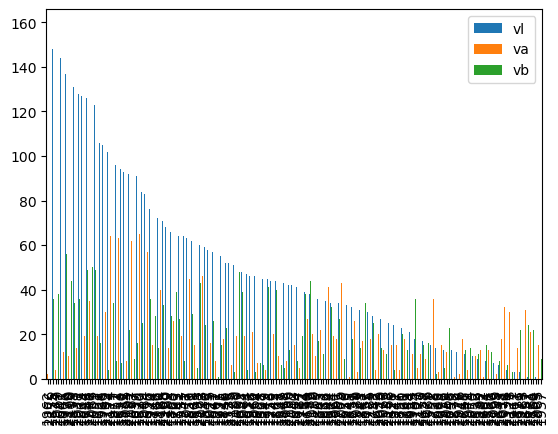

In [137]:
gg[gg["season"]=="summer"][gg["season2"]=="summer"][["vl", "va", "vb"]].plot(kind="bar")

/tmp/ipykernel_6678/4281433317.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="summer"][gg["season2"]=="autumn"][["vl", "va", "vb"]].plot(kind="bar")


<AxesSubplot:>

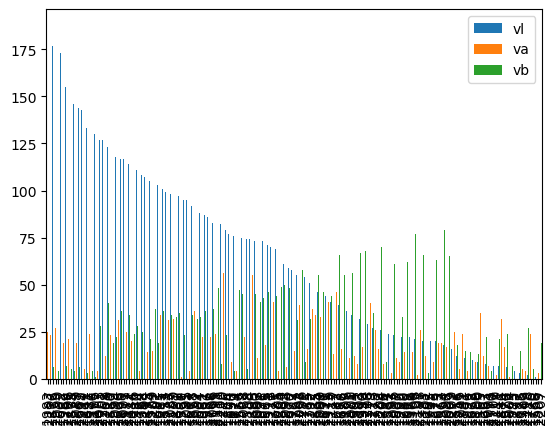

In [138]:
gg[gg["season"]=="summer"][gg["season2"]=="autumn"][["vl", "va", "vb"]].plot(kind="bar")

/tmp/ipykernel_6678/378663910.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="summer"][gg["season2"]=="winter"][["vl", "va", "vb"]].plot(kind="bar")


<AxesSubplot:>

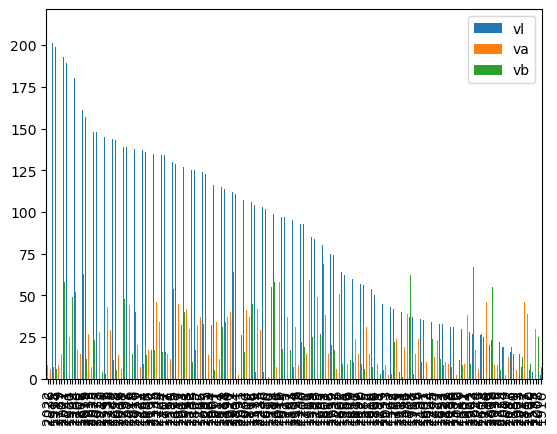

In [139]:
gg[gg["season"]=="summer"][gg["season2"]=="winter"][["vl", "va", "vb"]].plot(kind="bar")

/tmp/ipykernel_6678/807300048.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["va"]>=41].sort_values(by=["vb"],ascending=False).plot(kind="bar")
/tmp/ipykernel_6678/807300048.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["va"]>=41].sort_values(by=["vb"],ascending=False).plot(kind="bar")


<AxesSubplot:>

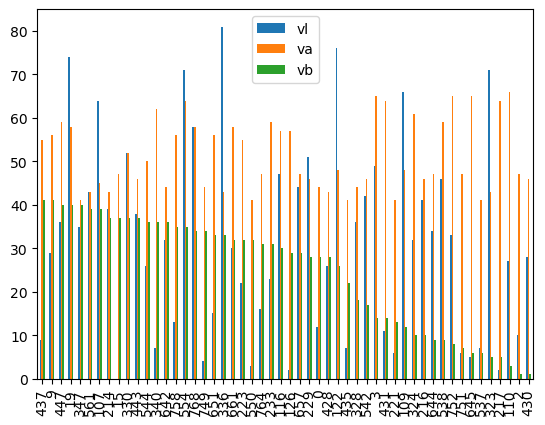

In [217]:
gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["va"]>=41].sort_values(by=["vb"],ascending=False).plot(kind="bar")

/tmp/ipykernel_6678/4293553193.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["va"]>=41].sort_values(by=["va", "vl"],ascending=False).plot(kind="bar")
/tmp/ipykernel_6678/4293553193.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["va"]>=41].sort_values(by=["va", "vl"],ascending=False).plot(kind="bar")


<AxesSubplot:>

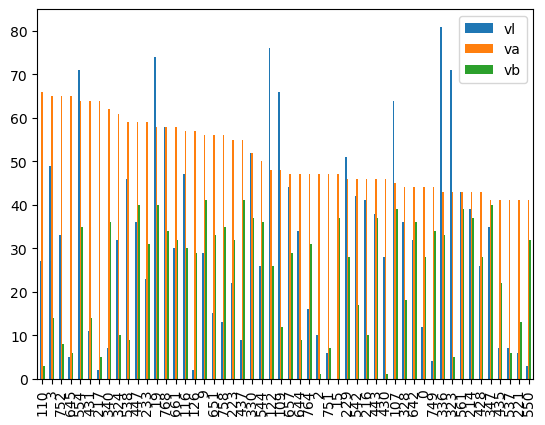

In [216]:
gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["va"]>=41].sort_values(by=["va", "vl"],ascending=False).plot(kind="bar")

/tmp/ipykernel_6678/2509906446.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["va"]>=41].sort_values(by=["vl","va","vb"],ascending=False).plot(kind="bar")
/tmp/ipykernel_6678/2509906446.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["va"]>=41].sort_values(by=["vl","va","vb"],ascending=False).plot(kind="bar")


<AxesSubplot:>

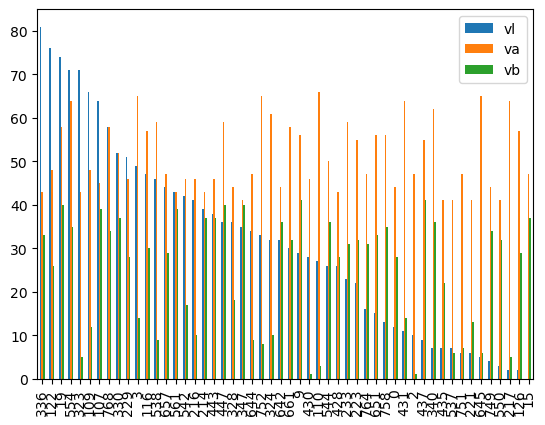

In [207]:
gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["va"]>=41].sort_values(by=["vl","va","vb"],ascending=False).plot(kind="bar")

In [211]:
gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["va"]<=40].sort_values(by=["va"],ascending=False)

/tmp/ipykernel_6678/1611110554.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["va"]<=40].sort_values(by=["va"],ascending=False)
/tmp/ipykernel_6678/1611110554.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["va"]<=40].sort_values(by=["va"],ascending=False)


,vl,va,vb
649,1,40,14
321,69,40,32
756,29,40,16
7,45,40,22
546,32,40,5
...,...,...,...
14,20,2,15
228,71,1,6
342,92,1,49
442,58,1,15


/tmp/ipykernel_6678/3122960434.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["va"]<=40].sort_values(by=["va"],ascending=False).plot(kind="bar")
/tmp/ipykernel_6678/3122960434.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["va"]<=40].sort_values(by=["va"],ascending=False).plot(kind="bar")


<AxesSubplot:>

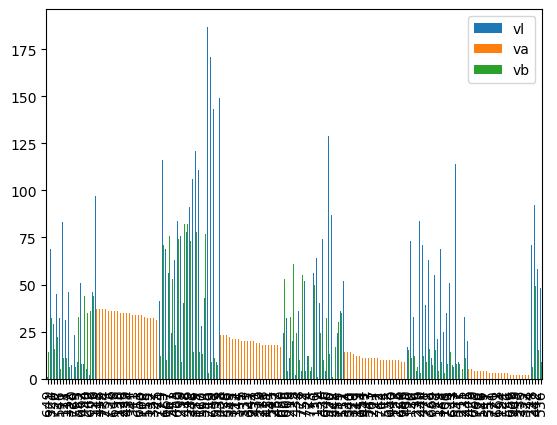

In [212]:
gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["va"]<=40].sort_values(by=["va"],ascending=False).plot(kind="bar")

/tmp/ipykernel_6678/386319744.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["va"]<=40].sort_values(by=["vl","vb"],ascending=False).plot(kind="bar")
/tmp/ipykernel_6678/386319744.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["va"]<=40].sort_values(by=["vl","vb"],ascending=False).plot(kind="bar")


<AxesSubplot:>

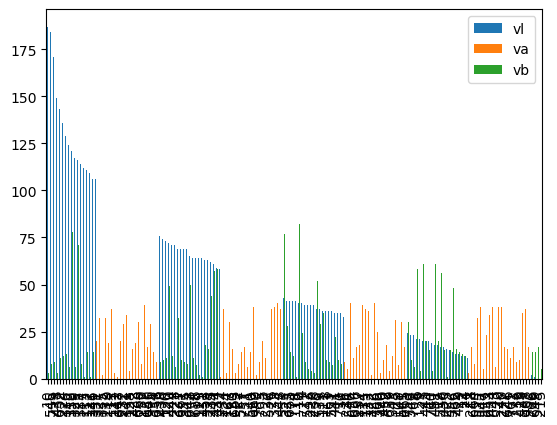

In [209]:
gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["va"]<=40].sort_values(by=["vl","vb"],ascending=False).plot(kind="bar")

/tmp/ipykernel_6678/1537786010.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["vl"]>=75].sort_values(by=["vl","va","vb"],ascending=False).plot(kind="bar")
/tmp/ipykernel_6678/1537786010.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["vl"]>=75].sort_values(by=["vl","va","vb"],ascending=False).plot(kind="bar")


<AxesSubplot:>

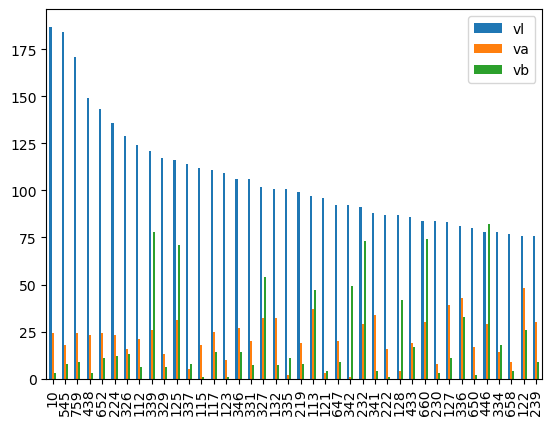

In [178]:
gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["vl"]>=75].sort_values(by=["vl","va","vb"],ascending=False).plot(kind="bar")

/tmp/ipykernel_6678/3587253032.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["vl"]<=75 ].sort_values(by=["vl","va","vb"],ascending=False).plot(kind="bar")
/tmp/ipykernel_6678/3587253032.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["vl"]<=75 ].sort_values(by=["vl","va","vb"],ascending=False).plot(kind="bar")


<AxesSubplot:>

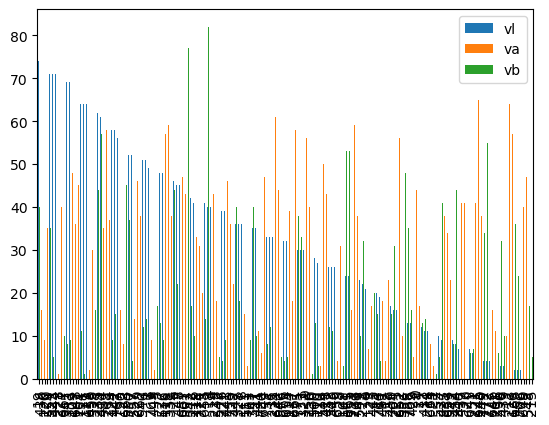

In [179]:
gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]][gg["vl"]<=75 ].sort_values(by=["vl","va","vb"],ascending=False).plot(kind="bar")

/tmp/ipykernel_6678/629839973.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]].plot(kind="bar")


<AxesSubplot:>

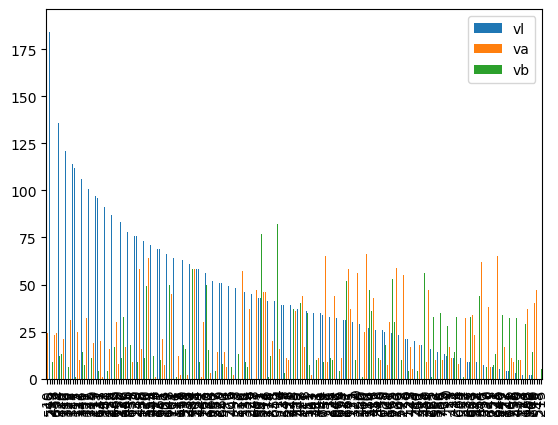

In [140]:
gg[gg["season"]=="autumn"][gg["season2"]=="spring"][["vl", "va", "vb"]].plot(kind="bar")

In [196]:
gg[gg["season"]=="autumn"][gg["season2"]=="summer"][["vl", "va", "vb"]]

/tmp/ipykernel_6678/1501782504.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="summer"][["vl", "va", "vb"]]


,vl,va,vb
36,146,8,39
571,143,2,44
785,130,8,45
39,129,18,37
369,127,21,33
...,...,...,...
587,2,15,31
241,1,24,59
52,1,21,26
691,1,19,18


/tmp/ipykernel_6678/993197737.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="summer"][["vl","va","vb"]].sort_values(by=["va","vb"], ascending=False).plot(kind="bar")


<AxesSubplot:>

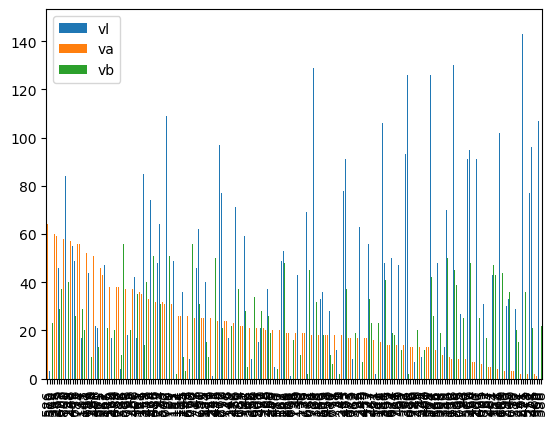

In [224]:
gg[gg["season"]=="autumn"][gg["season2"]=="summer"][["vl","va","vb"]].sort_values(by=["va","vb"], ascending=False).plot(kind="bar")

/tmp/ipykernel_6678/1517129218.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="summer"][["vb", "va", "vl"]].plot(kind="bar")


<AxesSubplot:>

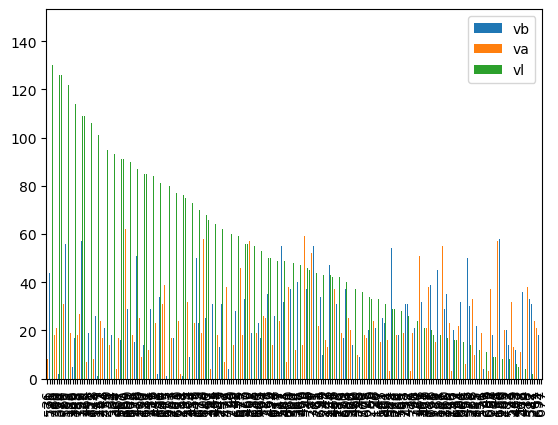

In [197]:
gg[gg["season"]=="autumn"][gg["season2"]=="summer"][["vb", "va", "vl"]].plot(kind="bar")

/tmp/ipykernel_6678/2495880544.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="summer"][["vl", "va", "vb"]].plot(kind="bar")


<AxesSubplot:>

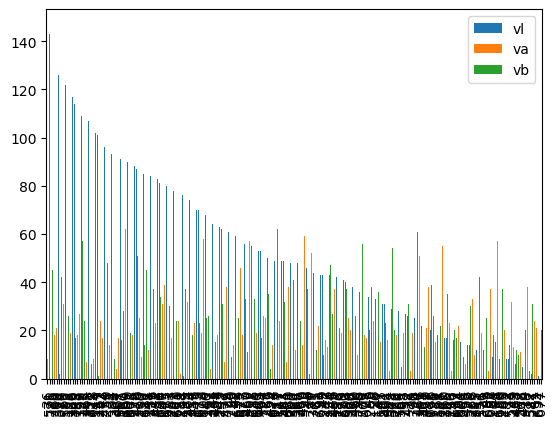

In [141]:
gg[gg["season"]=="autumn"][gg["season2"]=="summer"][["vl", "va", "vb"]].plot(kind="bar")

/tmp/ipykernel_6678/3142012665.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="autumn"][["vl", "va", "vb"]].plot(kind="bar")


<AxesSubplot:>

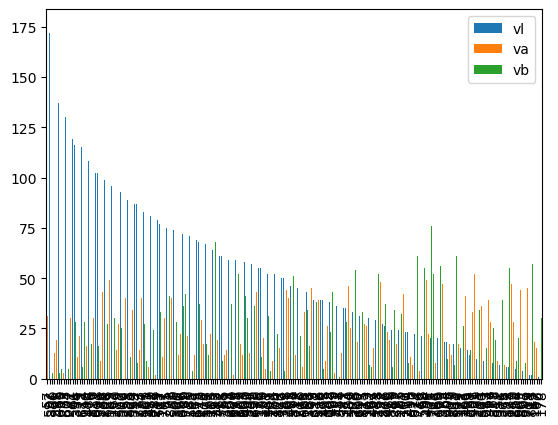

In [142]:
gg[gg["season"]=="autumn"][gg["season2"]=="autumn"][["vl", "va", "vb"]].plot(kind="bar")

/tmp/ipykernel_6678/288963605.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="autumn"][gg["season2"]=="winter"][["vl", "va", "vb"]].plot(kind="bar")


<AxesSubplot:>

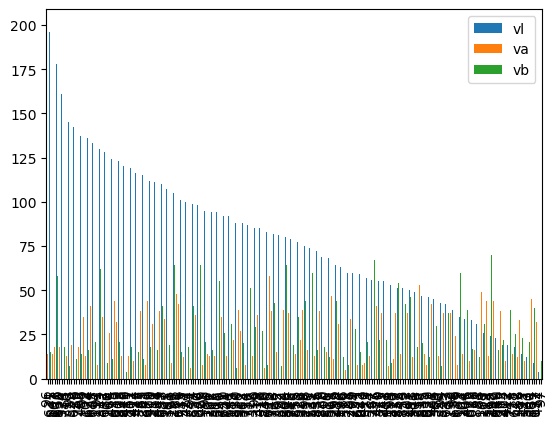

In [143]:
gg[gg["season"]=="autumn"][gg["season2"]=="winter"][["vl", "va", "vb"]].plot(kind="bar")

In [155]:
gg[gg["season"]=="spring"][gg["season2"]=="spring"][["vl", "va", "vb"]].sort_values(by="vb")

/tmp/ipykernel_6678/3880526861.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="spring"][gg["season2"]=="spring"][["vl", "va", "vb"]].sort_values(by="vb")


,vl,va,vb
1393,2,40,0
1090,22,30,0
1187,173,16,1
1179,4,39,1
1072,5,39,1
...,...,...,...
1302,74,28,78
1088,55,22,82
1409,48,23,83
1195,54,22,84


/tmp/ipykernel_6678/3791308694.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="spring"][gg["season2"]=="spring"][["vl", "va", "vb"]].plot(kind="bar")


<AxesSubplot:>

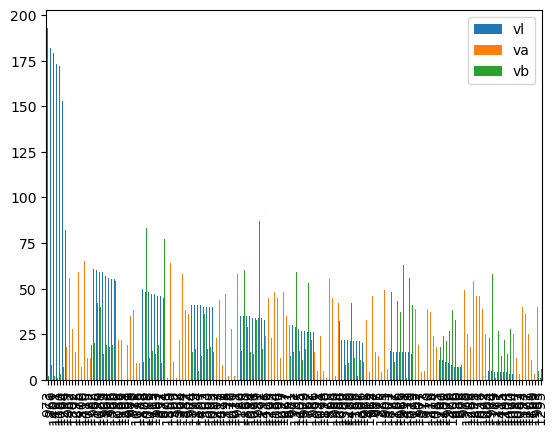

In [148]:
gg[gg["season"]=="spring"][gg["season2"]=="spring"][["vl", "va", "vb"]].plot(kind="bar")

/tmp/ipykernel_6678/1374826619.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="spring"][gg["season2"]=="summer"][["vl", "va", "vb"]].plot(kind="bar")


<AxesSubplot:>

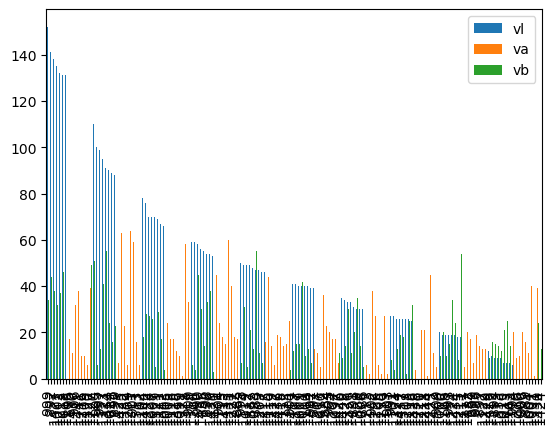

In [149]:
gg[gg["season"]=="spring"][gg["season2"]=="summer"][["vl", "va", "vb"]].plot(kind="bar")

/tmp/ipykernel_6678/3385680404.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="spring"][gg["season2"]=="autumn"][["vl", "va", "vb"]].plot(kind="bar")


<AxesSubplot:>

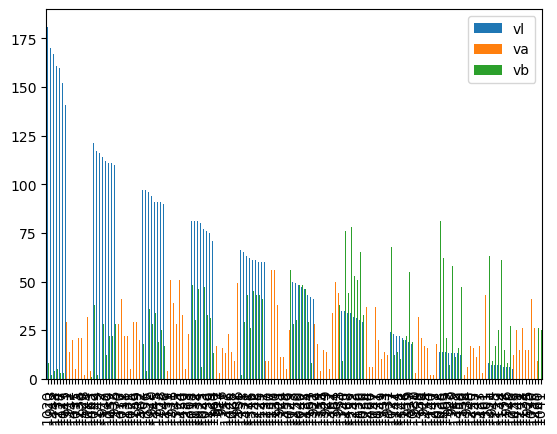

In [150]:
gg[gg["season"]=="spring"][gg["season2"]=="autumn"][["vl", "va", "vb"]].plot(kind="bar")

/tmp/ipykernel_6678/3511067995.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="spring"][gg["season2"]=="winter"][["vl", "va", "vb"]].sort_values(by=["vb"]).plot(kind="bar")


<AxesSubplot:>

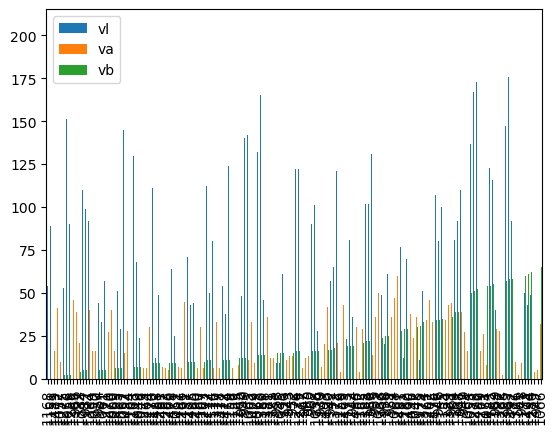

In [169]:
# gg[gg["season"]=="spring"][gg["season2"]=="winter"][["vl", "va", "vb"]].sort_values(by=["vb"]).plot(kind="bar")
# gg[gg["season"]=="spring"][gg["season2"]=="winter"][["vl", "va", "vb"]].plot(kind="bar")

In [159]:
gg[gg["season"]=="spring"][gg["season2"]=="winter"][["vl", "va", "vb"]]

/tmp/ipykernel_6678/4104709438.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gg[gg["season"]=="spring"][gg["season2"]=="winter"][["vl", "va", "vb"]]


,vl,va,vb
1059,205,16,5
952,194,13,15
1487,191,7,9
1064,187,16,48
1273,185,6,8
...,...,...,...
1175,11,37,31
953,9,37,15
1045,9,14,15
1389,8,43,35
